In [18]:
import os
import pandas as pd
from pandas.plotting import parallel_coordinates
from pandas_profiling import ProfileReport
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carpeta de almacenamiento de insumos o fuentes de informacion

print(os.listdir(r"Insumos"))

['Pokemon.csv', 'temporal.csv']


In [3]:
n_sample = 15
df1 = pd.DataFrame({"A":np.linspace(1,n_sample,n_sample)})
df1 = pd.concat([df1,pd.DataFrame({"B":np.random.randn(n_sample),
                                   "C":np.random.rand(n_sample),
                                   "D":np.random.poisson(lam=15, size=n_sample),
                                   "E":np.random.gamma(2, 2, n_sample)})]# mean=4, std=2*sqrt(2)
                ,axis=1)

df1.iloc[2,4] = np.nan
df1.iloc[4,2] = np.nan
df1.iloc[7,3] = np.nan

In [4]:
df1

,A,B,C,D,E
0,1.0,0.108851,0.276453,16.0,3.294662
1,2.0,-1.621440,0.871388,13.0,6.044950
2,3.0,0.304290,0.915962,14.0,NaN
3,4.0,-0.955680,0.522631,10.0,5.071790
4,5.0,0.365921,NaN,20.0,1.414714
5,6.0,-1.279320,0.286413,13.0,6.377658
6,7.0,-0.962205,0.151202,11.0,4.939003
7,8.0,0.084670,0.465793,NaN,6.803857
8,9.0,-0.011555,0.396702,15.0,5.838778
9,10.0,-1.128523,0.058999,12.0,3.882656


## Estilos de un dataframe

In [5]:
df1.style.set_properties(**{'background-color': 'black',
                            'color': 'lawngreen',
                            'border-color': 'white'})

,A,B,C,D,E
0,1.000000,0.108851,0.276453,16.000000,3.294662
1,2.000000,-1.621440,0.871388,13.000000,6.044950
2,3.000000,0.304290,0.915962,14.000000,nan
3,4.000000,-0.955680,0.522631,10.000000,5.071790
4,5.000000,0.365921,nan,20.000000,1.414714
5,6.000000,-1.279320,0.286413,13.000000,6.377658
6,7.000000,-0.962205,0.151202,11.000000,4.939003
7,8.000000,0.084670,0.465793,nan,6.803857
8,9.000000,-0.011555,0.396702,15.000000,5.838778
9,10.000000,-1.128523,0.058999,12.000000,3.882656


Aplicamos un gradiente por columna el cual va sombreando de un color mas fuerte los valores mas altos

In [6]:
cm = sns.light_palette("purple",as_cmap=True)

df1.style.background_gradient(cmap = cm)

,A,B,C,D,E
0,1.000000,0.108851,0.276453,16.000000,3.294662
1,2.000000,-1.621440,0.871388,13.000000,6.044950
2,3.000000,0.304290,0.915962,14.000000,nan
3,4.000000,-0.955680,0.522631,10.000000,5.071790
4,5.000000,0.365921,nan,20.000000,1.414714
5,6.000000,-1.279320,0.286413,13.000000,6.377658
6,7.000000,-0.962205,0.151202,11.000000,4.939003
7,8.000000,0.084670,0.465793,nan,6.803857
8,9.000000,-0.011555,0.396702,15.000000,5.838778
9,10.000000,-1.128523,0.058999,12.000000,3.882656


Aplicamos un gráfico de barras a los datos de un subconjunto de columnas del dataframe

In [7]:
df1.style.bar(align="mid",color=["lightcoral","lightskyblue"])

,A,B,C,D,E
0,1.000000,0.108851,0.276453,16.000000,3.294662
1,2.000000,-1.621440,0.871388,13.000000,6.044950
2,3.000000,0.304290,0.915962,14.000000,nan
3,4.000000,-0.955680,0.522631,10.000000,5.071790
4,5.000000,0.365921,nan,20.000000,1.414714
5,6.000000,-1.279320,0.286413,13.000000,6.377658
6,7.000000,-0.962205,0.151202,11.000000,4.939003
7,8.000000,0.084670,0.465793,nan,6.803857
8,9.000000,-0.011555,0.396702,15.000000,5.838778
9,10.000000,-1.128523,0.058999,12.000000,3.882656


## Coordenadas paralelas

Tomando de referencia un gran dataset llamado **iris**

In [8]:
data_iris = sns.load_dataset('iris')

data_iris.head(n=15)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


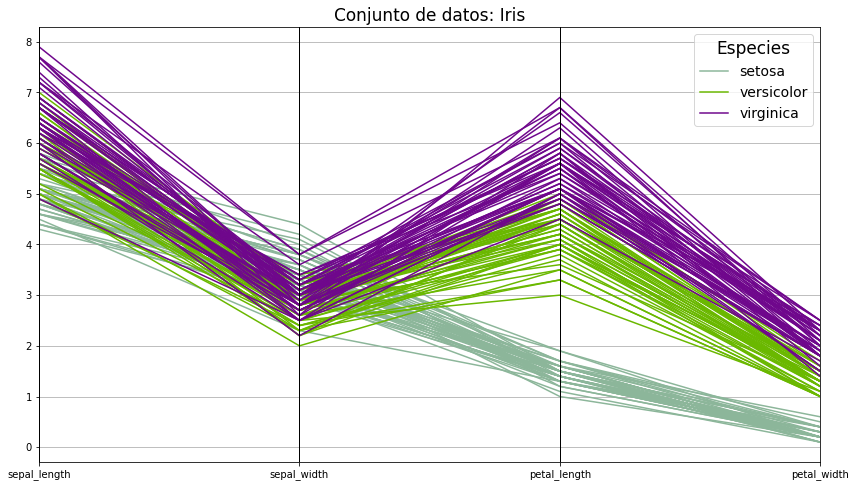

In [20]:
plt.figure(figsize=(14,8))
parallel_coordinates(data_iris,"species") # Nuestra variable categorica
plt.title("Conjunto de datos: Iris",fontsize=17)
plt.legend(title = "Especies",title_fontsize=17,prop={'size':14})
plt.show()

In [21]:
df_pokemon = pd.read_csv(r"Insumos\Pokemon.csv")
display(df_pokemon.tail(10))

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
790,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False
791,715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False
792,716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True
793,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [22]:
df_pokemon.shape

(800, 13)

In [23]:
df_pokemon.columns.tolist()

['#',
 'Name',
 'Type 1',
 'Type 2',
 'Total',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed',
 'Generation',
 'Legendary']

Filtremos por las columnas de nuestro interes

In [24]:
imp_fld = ["Total","HP","Attack","Defense","Sp. Atk","Sp. Def","Speed","Generation","Legendary"]
df_pokemon = df_pokemon[imp_fld].reset_index(drop=True)
display(df_pokemon.head(n=18))

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,318,45,49,49,65,65,45,1,False
1,405,60,62,63,80,80,60,1,False
2,525,80,82,83,100,100,80,1,False
3,625,80,100,123,122,120,80,1,False
4,309,39,52,43,60,50,65,1,False
5,405,58,64,58,80,65,80,1,False
6,534,78,84,78,109,85,100,1,False
7,634,78,130,111,130,85,100,1,False
8,634,78,104,78,159,115,100,1,False
9,314,44,48,65,50,64,43,1,False


In [25]:
cm = sns.light_palette("green",as_cmap=True)
display(df_pokemon.style.background_gradient(cmap = cm))

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,318,45,49,49,65,65,45,1,False
1,405,60,62,63,80,80,60,1,False
2,525,80,82,83,100,100,80,1,False
3,625,80,100,123,122,120,80,1,False
4,309,39,52,43,60,50,65,1,False
5,405,58,64,58,80,65,80,1,False
6,534,78,84,78,109,85,100,1,False
7,634,78,130,111,130,85,100,1,False
8,634,78,104,78,159,115,100,1,False
9,314,44,48,65,50,64,43,1,False


In [26]:
df_pokemon.loc[:8].style.background_gradient(cmap="Blues")

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,318,45,49,49,65,65,45,1,False
1,405,60,62,63,80,80,60,1,False
2,525,80,82,83,100,100,80,1,False
3,625,80,100,123,122,120,80,1,False
4,309,39,52,43,60,50,65,1,False
5,405,58,64,58,80,65,80,1,False
6,534,78,84,78,109,85,100,1,False
7,634,78,130,111,130,85,100,1,False
8,634,78,104,78,159,115,100,1,False


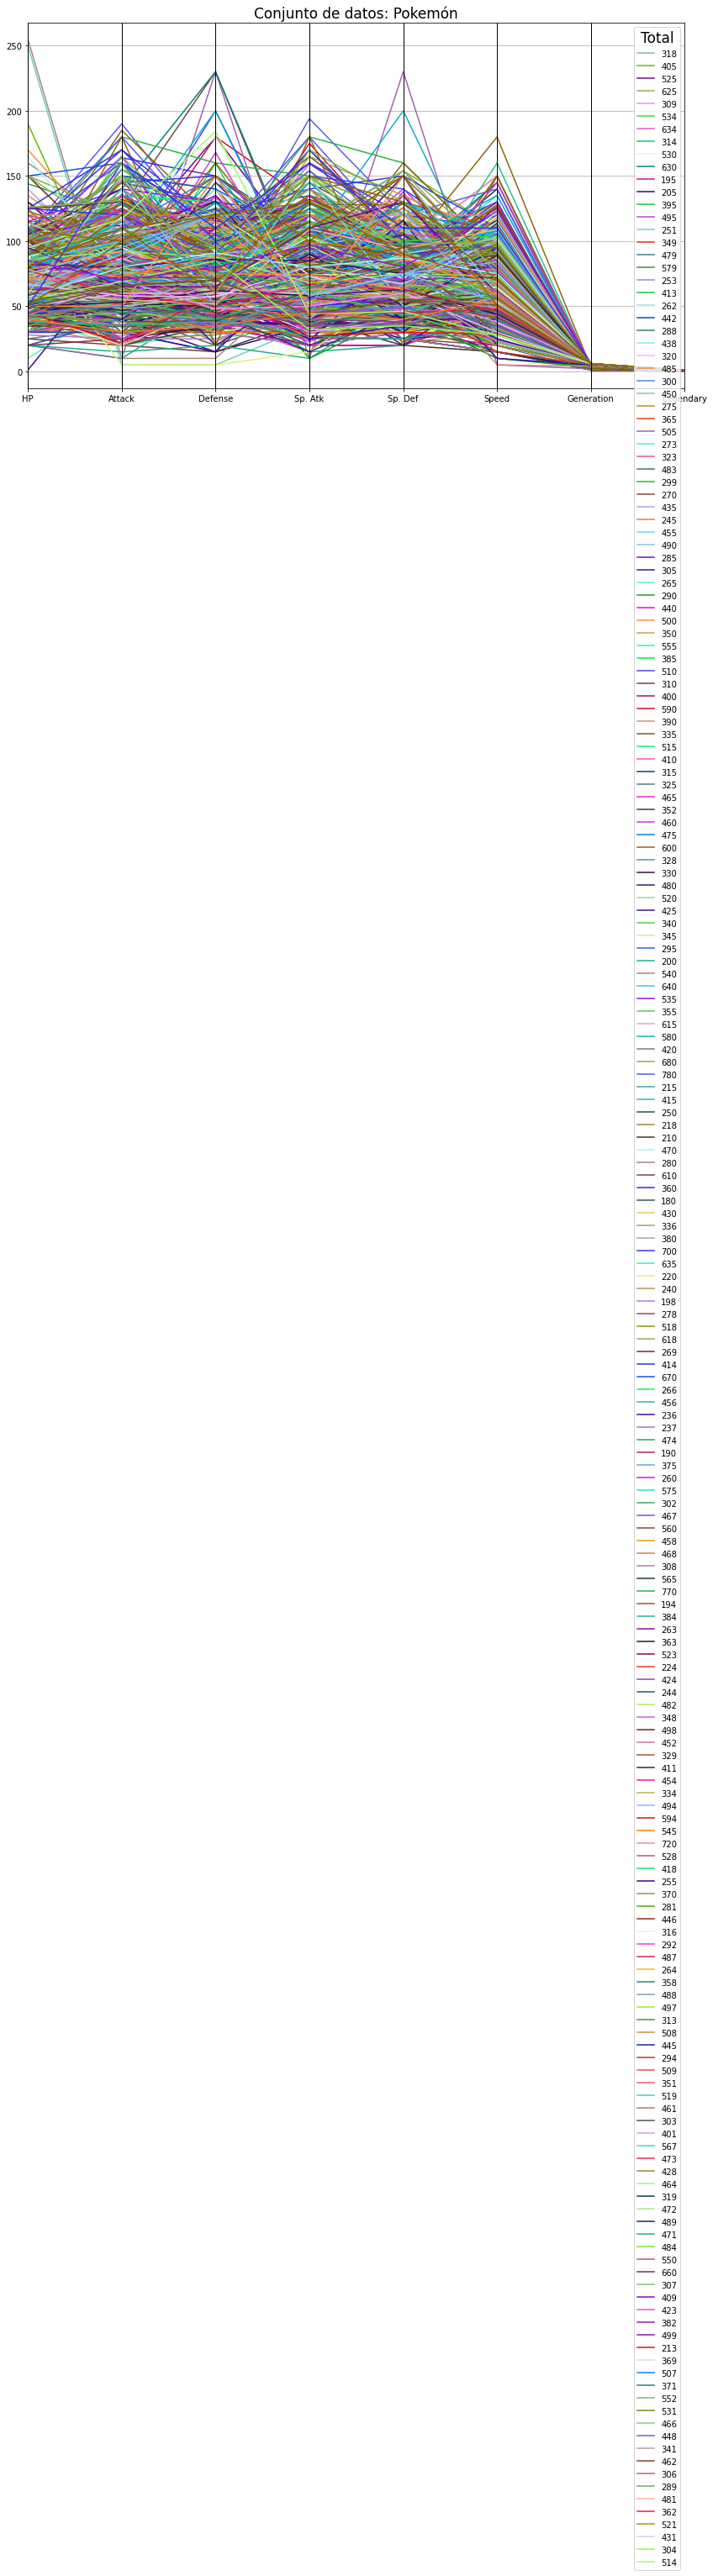

In [27]:
plt.figure(figsize=(14,8))
parallel_coordinates(df_pokemon,"Total") # Nuestra variable categorica
plt.title("Conjunto de datos: Pokemón",fontsize=17)
plt.legend(title = "Total",title_fontsize=17)
plt.show()

Reporte de analisis exploratorio

In [28]:
prof_df = ProfileReport(df_pokemon)
prof_df.to_file(output_file="reporte_pokemon.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]